In [39]:
import matplotlib.pyplot as plt

import numpy as np
import random as rnd

# Чтение данных из файла
with open('var_16_lognorm.csv', 'r') as f:
    data = [float(line.strip()) for line in f.readlines()]

Здесь будет попытка получить те же параметры для обрезанной выборки

In [40]:
# creating class for Data
class Statistics:
    def __init__(self, data: list, name: str):
        self.dataName = name
        self.dataArr = data
        self.dataLen = len(data)
        self.getAllParams()
        
    def dataSum(self):
        self.sum = sum(self.dataArr)
        return self.sum
    
    def dataMean(self):
        summ = self.dataSum()
        self.mean = summ / self.dataLen
        return self.mean
    
    def dataMedian(self):
        sortedData = sorted(self.dataArr)
        if self.dataLen % 2 == 0:
            # если количество элементов четное, берем среднее двух средних значений
            mid = self.dataLen // 2
            self.median = (sortedData[mid-1] + sortedData[mid]) / 2
        else:
            # если количество элементов нечетное, берем среднее значение
            self.median = sortedData[self.dataLen//2]
        return self.median
    
    def dataModa(self):
        # Создаем словарь, где ключи - элементы списка, а значения - количество их повторений
        countDict = {}
        for i in self.dataArr:
            if i in countDict:
                countDict[i] += 1
            else:
                countDict[i] = 1
        # Находим элемент(ы) с максимальным количеством повторений
        max_count = max(countDict.values())
        self.modes = []
        for key, value in countDict.items():
            if value == max_count:
                self.modes.append(key)

        # Возвращаем моду(ы)
        return self.modes
    
    def dataRange(self):
        self.range = max(self.dataArr) - min(self.dataArr)
        return self.range
    
    def dataBiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.biasedVariance = squared_differences_sum / (self.dataLen)
        return self.biasedVariance
    
    def dataUnbiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.unbiasedVariance = squared_differences_sum / (self.dataLen - 1)
        return self.unbiasedVariance
    
    def dataStartMoment(self, k):
        moment = sum([x**k for x in self.dataArr])/self.dataLen
        return moment
    
    def dataCenterMoment(self, k):
        mean = self.dataMean()
        moment = sum([(x - mean) ** k for x in self.dataArr])/self.dataLen
        return moment
    
    def getAllParams(self):
        self.dataSum()
        self.dataMean()
        self.dataMedian()
        self.dataModa()
        self.dataRange()
        self.dataBiasedVariance()
        self.dataUnbiasedVariance()

    def printAllParams(self, printStats:bool = False, printGraphics:bool = False):
        self.getAllParams()
        print('='*100)
        print(f"Statistics for data: {self.dataName}")

        if printStats:
            print("Data mean is", self.mean)
            print("Data median is", self.median)
            print("Data moda is", self.modes)
            print("Data range is", self.range)
            print("Data Biased Variance is", self.biasedVariance)
            print("Data Unbiased Variance is", self.unbiasedVariance)
            print("Data start moment is", self.dataStartMoment(2))
            print("Data center moment is", self.dataCenterMoment(2))

        if printGraphics:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(self.dataArr, bins=range(int(min(self.dataArr)), int(max(self.dataArr)), 1), density=True)

            # Настройка внешнего вида графика
            ax.set_xlabel('Значение')
            ax.set_ylabel('Плотность вероятности')
            ax.set_title('Распределение')

            # Вывод графика на экран
            plt.show()
        print('='*100)
   
    def histogramm(self, columns:int=20, printMPL:bool = True, printOWN:bool = False, print_OWN_MPL:bool = False):
        data_array = sorted(self.dataArr)
        data_min = min(data_array)
        data_max = max(data_array)
        data_range = data_max-data_min
        data_step = data_range/columns
        data_cpy = data_array.copy()
        if(printOWN):
            data_columns = [[] for i in range(columns)]
            data_tmp = data_min
            for column_number in range(columns):
                elem_to_delete = []
                for i in range(len(data_cpy)):
                    if data_cpy[i] >= data_tmp and data_cpy[i] < data_tmp + data_step:
                        data_columns[column_number].append(data_cpy[i])
                        elem_to_delete.append(data_cpy[i])
                for el in elem_to_delete:
                    data_cpy.remove(el)
                data_tmp += data_step
            
            if(len(data_cpy) > 0):
                for i in range(len(data_cpy)):
                    data_columns[-1].append(data_cpy[i])

            data_columns_probability = [len(i) for i in data_columns]
            
            max_prob = max(data_columns_probability)
            if max_prob == 0:
                return # нет значений, нечего выводить

            column_width = 14
            string_down = "\033[30m\033[47m{:>6}╚".format(0)
            string_down += '═' * column_width * (columns+1) + "► Значение случайной величины "
            str_len = len(string_down)

            str_tmp = "\033[30m\033[47m      " + " "*column_width * (columns//2) +"Гистограмма выборки" 
            print(str_tmp + " " *(str_len-len(str_tmp)))
            str_tmp = " Встретилось "
            print(str_tmp + " " *(str_len-len(str_tmp)-10))
            str_tmp = "раз в выборке"
            print(str_tmp + " " *(str_len-len(str_tmp)-10))
            print("      ▲" + " " * (str_len-17))
            print("      ║" + " " * (str_len-17))
            
            additional_step = 1
            if max_prob > 50:
                additional_step = 5
            if max_prob > 100:
                additional_step = 10
            y_max = (max_prob//additional_step + 1 )*(additional_step)
            for y in range(0, y_max, additional_step):
                
                string = "\033[30m\033[47m{:>6}║".format(y_max - y)
                string += ' ' * (column_width//2)
                for i in range(columns):
                    if(data_columns_probability[i] >= y_max - y):
                        string += '\033[36m\033[47m█' * column_width
                    elif(data_columns_probability[i] >= 1 and (y_max - y) <= additional_step):
                        string += '\033[36m\033[47m▄' * column_width
                    else:
                        string += '\033[36m\033[47m ' * column_width
                string += ' ' * 37
                print(string)
            # string_down = "\033[30m\033[47m{:>6}╚".format(0)
            # string_down += '═' * column_width * (columns+1) + "► Значение случайной величины "
                        
            print(string_down)
            X_axes_str = [data_min + data_step * i for i in range(columns+1)]
            string_down2 = "       "
            for i in X_axes_str:
                string_down2 += "{:^14.2f}".format(i) 
            string_down2 += " "*30
            print(string_down2)

        if printMPL:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(data_array, bins=columns)

            # Настройка внешнего вида графика
            ax.set_xlabel('Значение')
            ax.set_ylabel('Плотность вероятности')
            ax.set_title('Распределение')

            # Вывод графика на экран
            plt.show()
        

classedOldData = Statistics(data, 'Read data')
classedOldData.printAllParams(printStats= True)

data_unbias = [data[i] - min(data) + 0.01 for i in range(len(data))]
classedUnbiasedData = Statistics(data_unbias, 'Unbiased Read data')
classedUnbiasedData.printAllParams(printStats= True)

Statistics for data: Read data
Data mean is 403173.42907651357
Data median is 9.5922675
Data moda is [8.98]
Data range is 67609309.661269
Data Biased Variance is 22862010778114.184
Data Unbiased Variance is 22938472352622.926
Data start moment is 23024559592027.523
Data center moment is 22862010778114.184
Statistics for data: Unbiased Read data
Data mean is 403164.45907651325
Data median is 0.6222674999999998
Data moda is [0.01]
Data range is 67609309.661269
Data Biased Variance is 22862010778114.184
Data Unbiased Variance is 22938472352622.926
Data start moment is 23024552359176.625
Data center moment is 22862010778114.184


$$Выборочная \space(эмпири́ческая)\space фу́нкция\space распределе́ния\space в\space математической\space статистике\space —\\\space это\space приближение\space теоретической\space функции\space распределения,\space построенное \space с помощью\space выборки\space из\space него.$$
$$ Пусть\space X_{1},\ldots ,X_{n}\space — \spaceвыборка\space объёма\space n ,\space порождённая \spaceслучайной\space величиной \space X, \space задаваемой \space функцией \space распределения \space F(x) $$
$$ Будем\space считать, \space что \space X_{i},\space где\space i \in \{1, n\}, \space n\in \N \space— \spaceнезависимые\space случайные \spaceвеличины,\\
определенные \space на\space некотором\space пространстве \space элементарных \space исходов \space \Omega $$
$$ Пусть \space x \in \R. \space Определим \space функцию \space \hat{F}(x) \space следующим\space образом: $$ 
$$ \hat{F}(x) = \frac{1}{n}\sum_{i=1}^{n}\theta (x-X_{i}), \space где $$
$$ \theta (x)={\begin{cases}0,&x<0;\\1,&x\geqslant 0.\end{cases}}\space  —\space  Функция \space Хевисайда  $$


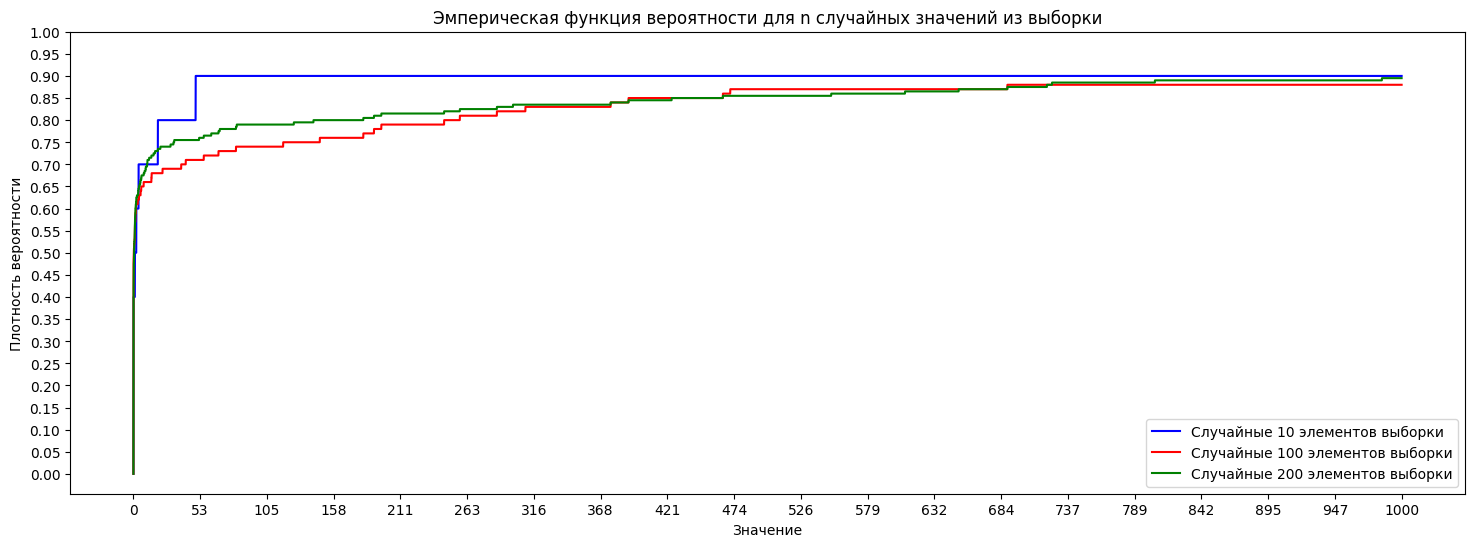

In [41]:
# плотность вероятности

rnd.seed(0)

def Heviside(x):
    if(x<0):
        return 0
    return 1

def f_hat(x, dataSet: Statistics):
    s = 0
    for xi in sorted(dataSet.dataArr):
        s += Heviside(x-xi)
    return s/dataSet.dataLen

def getRandomArr(dataSet: Statistics, len):
    result= rnd.sample(dataSet.dataArr, len)
    return result

dataRand_10 = getRandomArr(classedUnbiasedData, 10)
classedRandData_10 = Statistics(dataRand_10, 'Случайные 10 элементов выборки')
dataRand_100 = getRandomArr(classedUnbiasedData, 100)
classedRandData_100 = Statistics(dataRand_100, 'Случайные 100 элементов выборки')
dataRand_200 = getRandomArr(classedUnbiasedData, 200)
classedRandData_200 = Statistics(dataRand_200, 'Случайные 200 элементов выборки')

right_border = 1000 # поставить 20к или 200к для дальнего вида
left_border = 0
X = np.linspace(0.001 + left_border,right_border, num=10000)
# step = 100
# X = [a/step for a in range(0, 100*step)]
Y_10 = [f_hat(a, classedRandData_10) for a in X]
Y_100 = [f_hat(a, classedRandData_100) for a in X]
Y_200 = [f_hat(a, classedRandData_200) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_10, color='blue', label=f'{classedRandData_10.dataName}')
ax.plot(X, Y_100, color='red', label=f'{classedRandData_100.dataName}')
ax.plot(X, Y_200, color='green', label=f'{classedRandData_200.dataName}')

xt = np.linspace(left_border, right_border, num=20)
yt = [a/100 for a in range(0, 101, 5)]
ax.set_xticks(xt)
ax.set_yticks(yt)
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title('Эмперическая функция вероятности для n случайных значений из выборки')
ax.legend()

# Вывод графика на экран
plt.show()

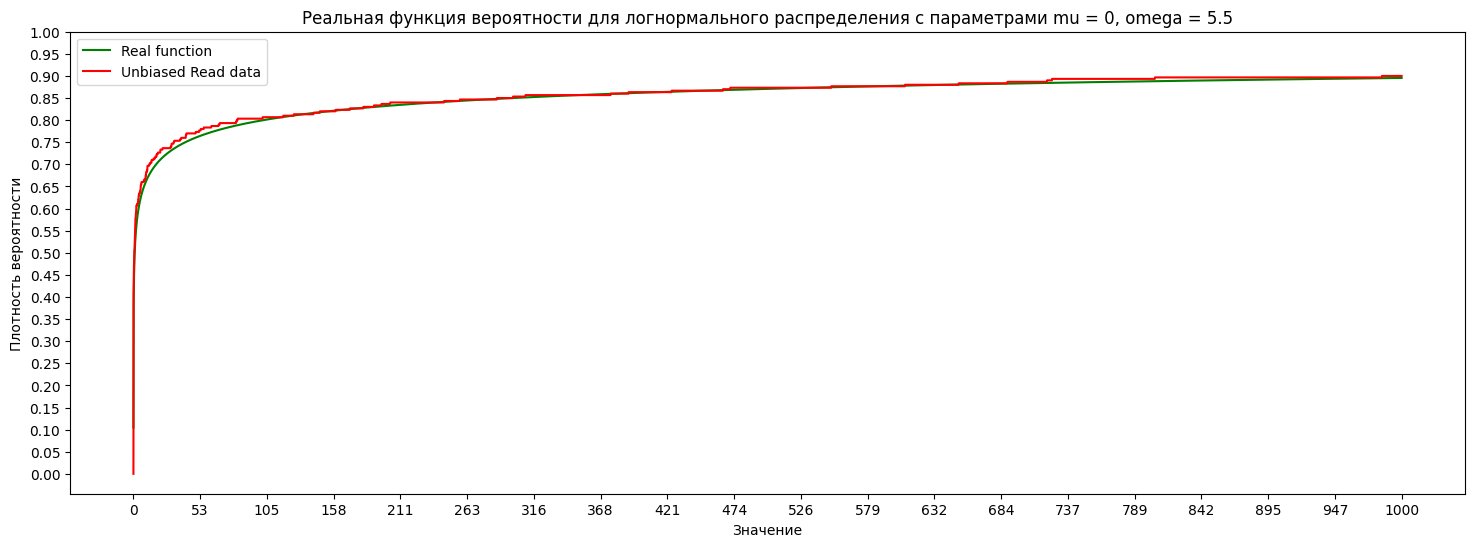

In [42]:
# теоретическая функция вероятности
import scipy as scp

def F_real(x, mu, sco, bias = 0):
    res = 1/2 + (scp.special.erf((np.log(x-bias)-mu)/(sco*(2**0.5))))/2
    return res

mu = 0
sco = 5.5
Y_real = [F_real(x, mu, sco) for x in X]

# bias = 8.9
# X_biased = np.linspace(0.001+bias+left_border,right_border, num=10000)
# Y_real_biased = [F_real(x, mu, sco, bias) for x in X_biased]

Y_read = [f_hat(a, classedUnbiasedData) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'Real function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
# ax.plot(X_biased, Y_real_biased, color='blue', label=f'Real biassed function')
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Реальная функция вероятности для логнормального распределения с параметрами mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()

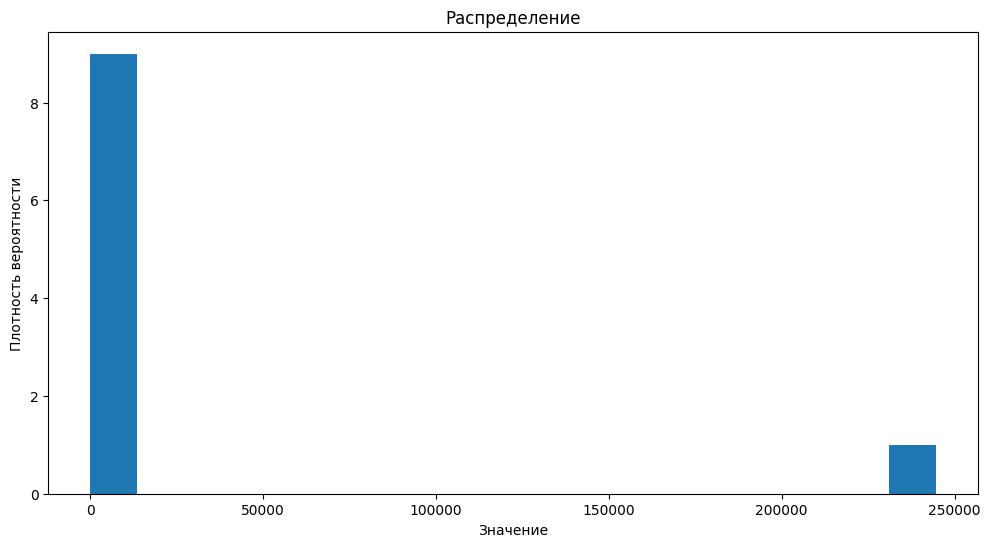

18


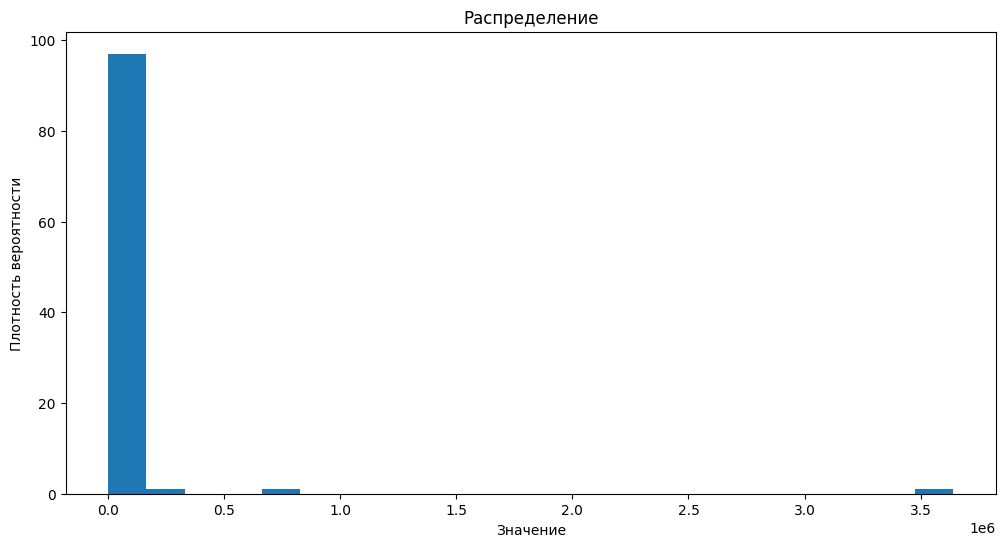

22


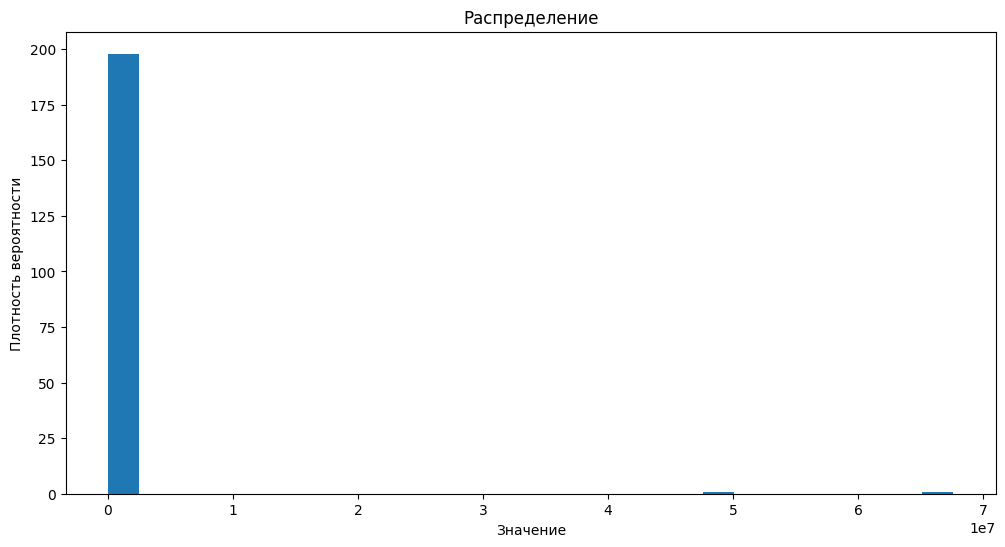

27


In [43]:
  
somedata = [rnd.randint(0, 100) for i in range (100)]
classedReallyRandomData = Statistics(somedata, name="Really random data")
# classedReallyRandomData.histogramm(columns=10)

# classedRandData_10.histogramm(columns=10);
# classedRandData_100.histogramm(columns=10);
# classedRandData_200.histogramm(columns=10);
classedRandData_10.histogramm(columns=(1 + int(np.log2(classedRandData_10.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_10.range))))
classedRandData_100.histogramm(columns=(1 + int(np.log2(classedRandData_100.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_100.range))))
classedRandData_200.histogramm(columns=(1 + int(np.log2(classedRandData_200.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_200.range))))

6. Понятие точечных оценок.  
    1. Оценить параметры распределения выборки методом моментов.   
    2. Оценить параметры распределения выборки методом максимального правдоподобия.  
    3. Привести и обосновать свойства полученных оценок: несмещенность, состоятельность, эффективность, R-эффективность.   
    4. На одном графике построить:  
        1.   теоретическую функцию распределения с оценками параметров распределения, найденными методом моментов;  
        2.   теоретическую функцию распределения с оценками параметров распределения, найденными методом максимального правдоподобия;  
        3.   эмпирическую функцию распределения (по всей выборке). Построенный график должен содержать наименование, подпись осей, легенду.  
    5. Занести соответствующие вычисления и график в отчет.  
    6. Сделать вывод о значении оценок параметров распределения и схожести эмпирической и теоретических функций распределения.  

mu = 10.430408561260634 ; sco = 2.2256195916920802
mu = 2.666062405434957 ; sco = 1.525978107108208


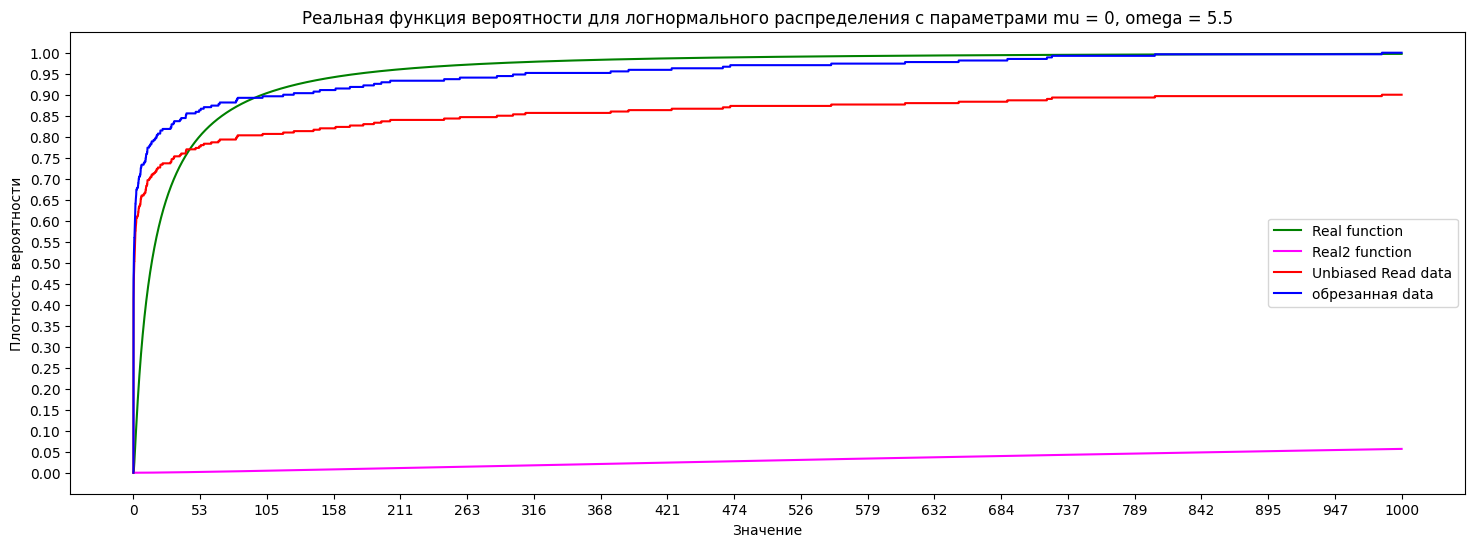

In [44]:
# метод моментов
def realMomentStartPowK(K, mu, sco):
    return np.e ** (K * mu + K*K*sco*sco/2)

def momentMethod(dataSet: Statistics):
    # E(X) = mean(X)
    # E(X^2) = mean(X^2)
    # mu + sco^2 / 2 = ln(mX)
    # 2mu + sco^2 * 2 = ln(mX^2)  
    # sco = sqrt(ln(mX^2)-2ln(mX))
    # mu = 2ln(mX)-0.5ln(mX^2)
    mX = dataSet.dataStartMoment(1)
    mX2 = dataSet.dataStartMoment(2)
    mu = 2 * np.log(mX) - 0.5 * np.log(mX2)
    sco = np.sqrt(np.log(mX2) - 2 * np.log(mX))
    print('mu =', str(mu), '; sco =', str(sco))

momentMethod(classedUnbiasedData)
data_new = sorted(data_unbias)[:270]
classedNewDat = Statistics(data_new, 'обрезанная data')
momentMethod(classedNewDat)

Y_real = [F_real(x, 2.6656494676596054, 1.5261064768969346) for x in X]
Y_real2 = [F_real(x, 10.430408511828189, 2.225619602758065) for x in X]
Y_read = [f_hat(a, classedUnbiasedData) for a in X]
Y_read2 = [f_hat(a, classedNewDat) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'Real function')
ax.plot(X, Y_real2, color='magenta', label=f'Real2 function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
ax.plot(X, Y_read2, color='blue', label=f'{classedNewDat.dataName}')
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Реальная функция вероятности для логнормального распределения с параметрами mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()



mu = -0.008087627793411323 ; sco = 0.4620523289688257
Statistics for data: test data
Data mean is 1.1036893799877259
Data median is 0.99
Data moda is [0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81]
Data range is 3.31
Data Biased Variance is 0.2899077308121207
Data Unbiased Variance is 0.2899373949613903
Data start moment is 1.5080379783098004
Data center moment is 0.2899077308121207
E(X) = 1.1331484530668263
Median = 1.0
Moda = 0.7788007830714049
D(X) = 0.3646958540123865


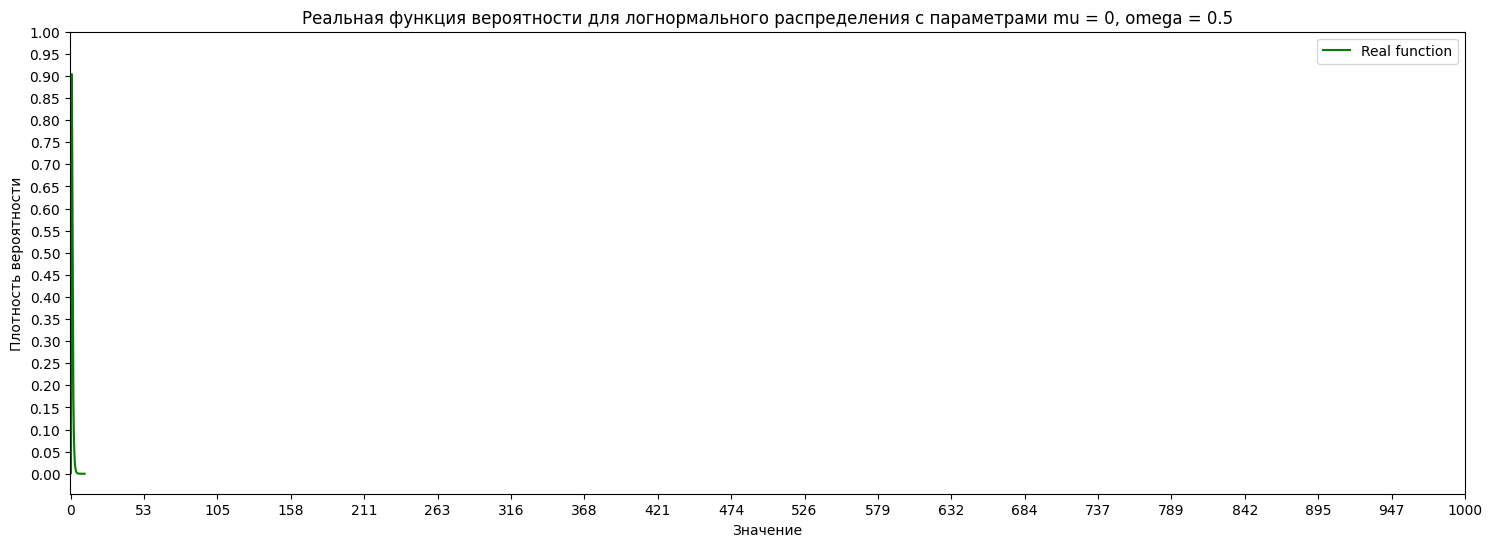

In [45]:
Y_real = []

def func(x, mu, sco):
    a = np.exp(-(((np.log(x)-mu)/sco)**2)/2)
    b = x * sco * np.sqrt(np.pi * 2)
    return a/b

mu = 0
sco = 1/2#np.sqrt(2)
Y_hist = []
for x in range(1, 1000000):
    for kolvo in range(int(100*func(x/100, mu, sco))):
        Y_real.append(x/100)
for x in range(1, 1000):
    Y_hist.append((func(x/100, mu, sco)))

classedNewDat = Statistics(Y_real, 'test data')
momentMethod(classedNewDat)
classedNewDat.printAllParams(printStats= True);

print('E(X) =', str(np.exp(mu+sco*sco/2)))
print('Median =', str(np.exp(mu)))
print('Moda =', str(np.exp(mu-sco*sco)))
print('D(X) =', str(np.exp(2*mu+sco*sco)*(np.exp(sco*sco)-1)))

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot([x/100 for x in range(1, 1000)], Y_hist, color='green', label=f'Real function')
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Реальная функция вероятности для логнормального распределения с параметрами mu = {mu}, omega = {sco}')
# xt = np.linspace(0, 10, num=40)
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()


In [46]:
# метод максимального правдоподобия
mu = sum([np.log(classedUnbiasedData.dataArr[i]) for i in range (len(classedUnbiasedData.dataArr))])/len(classedUnbiasedData.dataArr)
sсo2 = sum([(np.log(classedUnbiasedData.dataArr[i])-mu)**2 for i in range (len(classedUnbiasedData.dataArr))])/len(classedUnbiasedData.dataArr)
sсo = np.sqrt(sсo2)
print(mu, sсo)

0.34950075364905747 4.7866447473536935


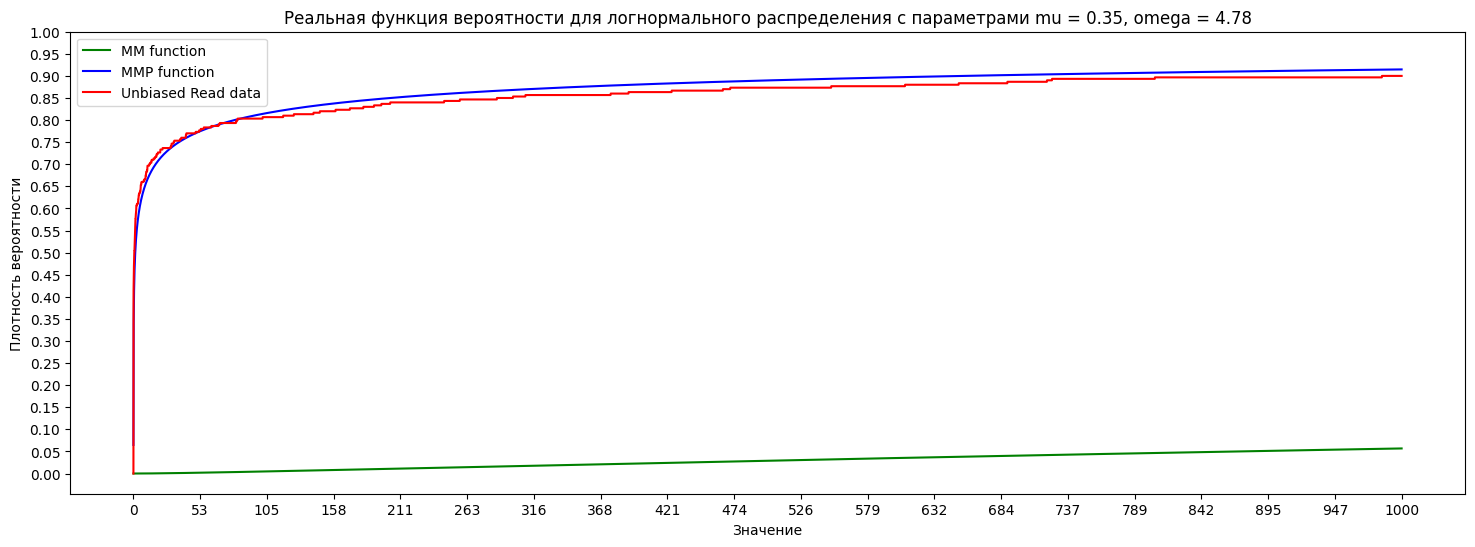

In [47]:
Y_real = [F_real(x, 10.430408511828189, 2.225619602758065) for x in X]
Y_real2 = [F_real(x, 0.34950075364905747, 4.7866447473536935) for x in X]
Y_read = [f_hat(a, classedUnbiasedData) for a in X]

mu = 0.35
sco = 4.78

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'MM function')
ax.plot(X, Y_real2, color='blue', label=f'MMP function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Реальная функция вероятности для логнормального распределения с параметрами mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()

# вывод - ММ хуета

7. Понятие интервальных оценок. 
    1. Оценить  параметры  распределения  выборки  с  помощью  интервальной  оценки  с уровнями доверия 𝛾1=0,95, 𝛾2=0,99  
    2. Занести соответствующие вычисления в отчет. 
    3. Сделать вывод о близости значений интервальных и точечных оценок